# Clustering

In [751]:
!pip install pyforest
from pyforest import *
lazy_imports()

['from sklearn import metrics',
 'import statsmodels.api as sm',
 'import seaborn as sns',
 'import lightgbm as lgb',
 'from sklearn import svm',
 'import imutils',
 'import awswrangler as wr',
 'import plotly as py',
 'from sklearn.linear_model import Lasso',
 'import cv2',
 'from sklearn.model_selection import cross_val_score',
 'from sklearn.preprocessing import StandardScaler',
 'from sklearn.ensemble import RandomForestRegressor',
 'import keras',
 'from fbprophet import Prophet',
 'from sklearn.model_selection import train_test_split',
 'import matplotlib as mpl',
 'from sklearn.preprocessing import PolynomialFeatures',
 'import numpy as np',
 'from sklearn.linear_model import LinearRegression',
 'import os',
 'import torch',
 'import plotly.express as px',
 'from sklearn.preprocessing import MinMaxScaler',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'import statistics',
 'import glob',
 'import skimage',
 'from xlrd import open_workbook',
 'import random',
 'fro

In [752]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plr
%matplotlib inline

### data preparation

In [753]:
df=pd.read_csv('Customer Data.csv')
df

CUST_ID    BALANCE    BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749      0.818182          95.40           0.00       
1     C10002  3202.467416      0.909091           0.00           0.00       
2     C10003  2495.148862      1.000000         773.17         773.17       
3     C10004  1666.670542      0.636364        1499.00        1499.00       
4     C10005   817.714335      1.000000          16.00          16.00       
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517      1.000000         291.12           0.00       
8946  C19187    19.183215      1.000000         300.00           0.00       
8947  C19188    23.398673      0.833333         144.40           0.00       
8948  C19189    13.457564      0.833333           0.00           0.00       
8949  C19190   372.708075      0.666667        1093.25        1093.25       

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0              95.40              0.000000       0.166667         
1               0.00           6442.945483       0.000000         
2               0.00              0.000000       1.000000         
3               0.00            205.788017       0.083333         
4               0.00              0.000000       0.083333         
...                      ...           ...                  ...   
8945          291.12              0.000000       1.000000         
8946          300.00              0.000000       1.000000         
8947          144.40              0.000000       0.833333         
8948            0.00             36.558778       0.000000         
8949            0.00            127.040008       0.666667         

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0              0.000000                       0.083333               
1              0.000000                       0.000000               
2              1.000000                       0.000000               
3              0.083333                       0.000000               
4              0.083333                       0.000000               
...                          ...                               ...   
8945           0.000000                       0.833333               
8946           0.000000                       0.833333               
8947           0.000000                       0.666667               
8948           0.000000                       0.000000               
8949           0.666667                       0.000000               

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0            0.000000                 0               2           1000.0      
1            0.250000                 4               0           7000.0      
2            0.000000                 0              12           7500.0      
3            0.083333                 1               1           7500.0      
4            0.000000                 0               1           1200.0      
...                      ...               ...            ...           ...   
8945         0.000000                 0               6           1000.0      
8946         0.000000                 0               6           1000.0      
8947         0.000000                 0               5           1000.0      
8948         0.166667                 2               0            500.0      
8949         0.333333                 2              23           1200.0      

       PAYMENTS    MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084      139.509787        0.000000        12    
1     4103.032597     1072.340217        0.222222        12    
2      622.066742      627.284787        0.000000        12    
3        0.000000             NaN        0.000000        12    
4      678.334763      244.791237        0.000000        12    
...           ...               ...               ...     ...  
8945   325.594462       48.886365    

## Exploratary Data Analysis(EDA)

In [754]:
df.shape

(8950, 18)

In [755]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [756]:
df.describe()

BALANCE    BALANCE_FREQUENCY    PURCHASES   ONEOFF_PURCHASES  \
count   8950.000000     8950.000000      8950.000000     8950.000000     
mean    1564.474828        0.877271      1003.204834      592.437371     
std     2081.531879        0.236904      2136.634782     1659.887917     
min        0.000000        0.000000         0.000000        0.000000     
25%      128.281915        0.888889        39.635000        0.000000     
50%      873.385231        1.000000       361.280000       38.000000     
75%     2054.140036        1.000000      1110.130000      577.405000     
max    19043.138560        1.000000     49039.570000    40761.250000     

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count        8950.000000        8950.000000      8950.000000       
mean          411.067645         978.871112         0.490351       
std           904.338115        2097.163877         0.401371       
min             0.000000           0.000000         0.000000       
25%             0.000000           0.000000         0.083333       
50%            89.000000           0.000000         0.500000       
75%           468.637500        1113.821139         0.916667       
max         22500.000000       47137.211760         1.000000       

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count          8950.000000                    8950.000000             
mean              0.202458                       0.364437             
std               0.298336                       0.397448             
min               0.000000                       0.000000             
25%               0.000000                       0.000000             
50%               0.083333                       0.166667             
75%               0.300000                       0.750000             
max               1.000000                       1.000000             

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count        8950.000000          8950.000000     8950.000000    8949.000000   
mean            0.135144             3.248827       14.709832    4494.449450   
std             0.200121             6.824647       24.857649    3638.815725   
min             0.000000             0.000000        0.000000      50.000000   
25%             0.000000             0.000000        1.000000    1600.000000   
50%             0.000000             0.000000        7.000000    3000.000000   
75%             0.222222             4.000000       17.000000    6500.000000   
max             1.500000           123.000000      358.000000   30000.000000   

         PAYMENTS    MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE     
count   8950.000000     8637.000000       8950.000000    8950.000000  
mean    1733.143852      864.206542          0.153715      11.517318  
std     2895.063757     2372.446607          0.292499       1.338331  
min        0.000000        0.019163          0.000000       6.000000  
25%      383.276166      169.123707          0.000000      12.000000  
50%      856.901546      312.343947          0.000000      12.000000  
75%     1901.134317      825.485459          0.142857      12.000000  
max    50721.483360    76406.207520          1.000000      12.000000

In [757]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [758]:
df.head()

CUST_ID    BALANCE    BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749      0.818182          95.40           0.00       
1  C10002  3202.467416      0.909091           0.00           0.00       
2  C10003  2495.148862      1.000000         773.17         773.17       
3  C10004  1666.670542      0.636364        1499.00        1499.00       
4  C10005   817.714335      1.000000          16.00          16.00       

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0           95.4               0.000000       0.166667         
1            0.0            6442.945483       0.000000         
2            0.0               0.000000       1.000000         
3            0.0             205.788017       0.083333         
4            0.0               0.000000       0.083333         

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0           0.000000                       0.083333               
1           0.000000                       0.000000               
2           1.000000                       0.000000               
3           0.083333                       0.000000               
4           0.083333                       0.000000               

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0         0.000000                 0               2           1000.0      
1         0.250000                 4               0           7000.0      
2         0.000000                 0              12           7500.0      
3         0.083333                 1               1           7500.0      
4         0.000000                 0               1           1200.0      

    PAYMENTS    MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084      139.509787        0.000000        12    
1  4103.032597     1072.340217        0.222222        12    
2   622.066742      627.284787        0.000000        12    
3     0.000000             NaN        0.000000        12    
4   678.334763      244.791237        0.000000        12

In [759]:
df=df.drop(columns=['CUST_ID'], axis=1)
df.head()

BALANCE    BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749      0.818182          95.40           0.00       
1  3202.467416      0.909091           0.00           0.00       
2  2495.148862      1.000000         773.17         773.17       
3  1666.670542      0.636364        1499.00        1499.00       
4   817.714335      1.000000          16.00          16.00       

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0           95.4               0.000000       0.166667         
1            0.0            6442.945483       0.000000         
2            0.0               0.000000       1.000000         
3            0.0             205.788017       0.083333         
4            0.0               0.000000       0.083333         

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0           0.000000                       0.083333               
1           0.000000                       0.000000               
2           1.000000                       0.000000               
3           0.083333                       0.000000               
4           0.083333                       0.000000               

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0         0.000000                 0               2           1000.0      
1         0.250000                 4               0           7000.0      
2         0.000000                 0              12           7500.0      
3         0.083333                 1               1           7500.0      
4         0.000000                 0               1           1200.0      

    PAYMENTS    MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084      139.509787        0.000000        12    
1  4103.032597     1072.340217        0.222222        12    
2   622.066742      627.284787        0.000000        12    
3     0.000000             NaN        0.000000        12    
4   678.334763      244.791237        0.000000        12

In [760]:
df.duplicated().sum()

0

In [761]:
df1=df.copy()

#### CREDIT_LIMIT

<Axes: xlabel='CREDIT_LIMIT', ylabel='Density'>

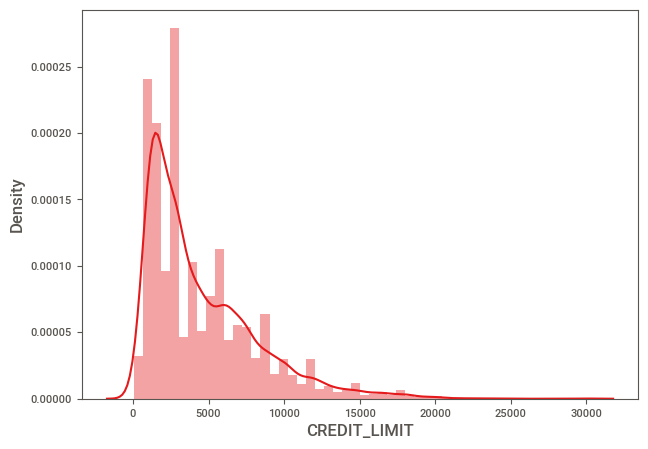

In [762]:
sns.distplot(df1.CREDIT_LIMIT)

<Axes: xlabel='CREDIT_LIMIT'>

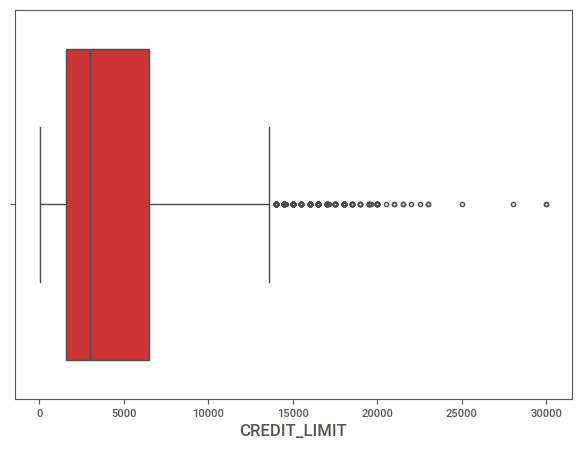

In [763]:
sns.boxplot(x=df1.CREDIT_LIMIT)

In [764]:
df1.CREDIT_LIMIT.skew()   #skewness

1.5224640052886198

In [765]:
df1[df1.CREDIT_LIMIT.isnull()]

BALANCE   BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
5203  18.400472      0.166667          0.0            0.0         

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
5203            0.0            186.853063           0.0           

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
5203              0.0                            0.0                 

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
5203         0.166667                 1               0            NaN        

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
5203  9.040017      14.418723            0.0           6

In [766]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
itr_imp=IterativeImputer()
df1['CREDIT_LIMIT']= itr_imp.fit_transform(df1[['CREDIT_LIMIT']])

df1.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

#### MINIMUM_PAYMENTS 

In [767]:
df1[df1['MINIMUM_PAYMENTS'].isnull()]

BALANCE    BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
3     1666.670542      0.636364        1499.00        1499.00       
45    2242.311686      1.000000         437.00          97.00       
47    3910.111237      1.000000           0.00           0.00       
54       6.660517      0.636364         310.00           0.00       
55    1311.995984      1.000000        1283.90        1283.90       
56    3625.218146      1.000000         313.27         313.27       
63       7.152356      0.090909         840.00         840.00       
93    1307.717841      1.000000         405.60         405.60       
94    2329.485768      1.000000         213.34         213.34       
97    3505.671311      1.000000           0.00           0.00       
99       0.000000      0.000000           0.00           0.00       
103      0.624240      0.090909         389.96           0.00       
111   3393.351236      1.000000           0.00           0.00       
121   1464.324632      1.000000        1174.39        1174.39       
129     69.405545      0.090909           0.00           0.00       
130    116.654149      0.272727         907.00         907.00       
142   5347.814547      1.000000           0.00           0.00       
146     19.354559      0.909091         689.70           0.00       
156   5837.105453      1.000000        3488.49        3262.25       
176   1872.926275      1.000000         766.61         766.61       
181      0.000000      0.000000          23.00           0.00       
183      5.465999      0.090909         196.81         173.00       
188    861.001207      1.000000         969.56         969.56       
191    189.687964      1.000000          66.14          66.14       
215      2.433254      0.181818          36.00           0.00       
235   4014.388265      1.000000        1189.52        1189.52       
240   3215.511032      0.818182        1112.20        1112.20       
277     32.124999      0.272727         380.89         380.89       
309    566.908563      1.000000         397.06         303.70       
312    515.904786      1.000000        5359.02        2399.78       
319      0.478714      0.090909         734.97         159.00       
353     36.567901      0.090909        1098.31        1098.31       
372    282.934373      0.181818           0.00           0.00       
404   5523.999416      1.000000           0.00           0.00       
406    150.699542      0.363636         648.64         330.00       
412     16.581535      0.125000         200.00           0.00       
422   3737.175713      1.000000           0.00           0.00       
517    675.117139      0.181818           0.00           0.00       
573     11.890862      0.090909         165.00         165.00       
654      0.000000      0.000000           0.00           0.00       
667      1.979916      0.125000          80.00          80.00       
773   1252.583090      1.000000        1163.93         950.03       
782   9164.724752      1.000000        3407.69        2074.16       
788   2302.479845      1.000000           0.00           0.00       
796    147.180819      0.636364           0.00           0.00       
805   1373.277423      0.818182           0.00           0.00       
818    674.817091      1.000000        1152.83           0.00       
833   1437.895562      1.000000         350.00           0.00       
840    230.359954      1.000000        2163.12        1383.12       
846   1255.779743      1.000000         385.00         385.00       
852    992.599867      1.000000         100.00         100.00       
859   1374.460976      1.000000        1990.81           0.00       
860      0.000000      0.000000         199.88           0.00       
867   1254.970145      1.000000         769.34         769.34       
868   2174.018945      1.000000         377.10         177.62       
875   1948.434315      1.000000         324.30         324.30       
877    802.274379      0.636364         150.00           0.00       
878   

In [768]:
df1.MINIMUM_PAYMENTS.min()

0.019163

In [769]:
df1.MINIMUM_PAYMENTS.max()

76406.20752

In [770]:
df1.describe()

BALANCE    BALANCE_FREQUENCY    PURCHASES   ONEOFF_PURCHASES  \
count   8950.000000     8950.000000      8950.000000     8950.000000     
mean    1564.474828        0.877271      1003.204834      592.437371     
std     2081.531879        0.236904      2136.634782     1659.887917     
min        0.000000        0.000000         0.000000        0.000000     
25%      128.281915        0.888889        39.635000        0.000000     
50%      873.385231        1.000000       361.280000       38.000000     
75%     2054.140036        1.000000      1110.130000      577.405000     
max    19043.138560        1.000000     49039.570000    40761.250000     

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count        8950.000000        8950.000000      8950.000000       
mean          411.067645         978.871112         0.490351       
std           904.338115        2097.163877         0.401371       
min             0.000000           0.000000         0.000000       
25%             0.000000           0.000000         0.083333       
50%            89.000000           0.000000         0.500000       
75%           468.637500        1113.821139         0.916667       
max         22500.000000       47137.211760         1.000000       

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count          8950.000000                    8950.000000             
mean              0.202458                       0.364437             
std               0.298336                       0.397448             
min               0.000000                       0.000000             
25%               0.000000                       0.000000             
50%               0.083333                       0.166667             
75%               0.300000                       0.750000             
max               1.000000                       1.000000             

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count        8950.000000          8950.000000     8950.000000    8950.000000   
mean            0.135144             3.248827       14.709832    4494.449450   
std             0.200121             6.824647       24.857649    3638.612411   
min             0.000000             0.000000        0.000000      50.000000   
25%             0.000000             0.000000        1.000000    1600.000000   
50%             0.000000             0.000000        7.000000    3000.000000   
75%             0.222222             4.000000       17.000000    6500.000000   
max             1.500000           123.000000      358.000000   30000.000000   

         PAYMENTS    MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE     
count   8950.000000     8637.000000       8950.000000    8950.000000  
mean    1733.143852      864.206542          0.153715      11.517318  
std     2895.063757     2372.446607          0.292499       1.338331  
min        0.000000        0.019163          0.000000       6.000000  
25%      383.276166      169.123707          0.000000      12.000000  
50%      856.901546      312.343947          0.000000      12.000000  
75%     1901.134317      825.485459          0.142857      12.000000  
max    50721.483360    76406.207520          1.000000      12.000000

In [771]:
df_train= df1[df1.MINIMUM_PAYMENTS.notnull()]
df_train.head()

BALANCE    BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749      0.818182          95.40          0.00        
1  3202.467416      0.909091           0.00          0.00        
2  2495.148862      1.000000         773.17        773.17        
4   817.714335      1.000000          16.00         16.00        
5  1809.828751      1.000000        1333.28          0.00        

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0            95.40             0.000000       0.166667         
1             0.00          6442.945483       0.000000         
2             0.00             0.000000       1.000000         
4             0.00             0.000000       0.083333         
5          1333.28             0.000000       0.666667         

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0           0.000000                       0.083333               
1           0.000000                       0.000000               
2           1.000000                       0.000000               
4           0.083333                       0.000000               
5           0.000000                       0.583333               

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0           0.00                   0               2           1000.0      
1           0.25                   4               0           7000.0      
2           0.00                   0              12           7500.0      
4           0.00                   0               1           1200.0      
5           0.00                   0               8           1800.0      

    PAYMENTS    MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084      139.509787        0.000000        12    
1  4103.032597     1072.340217        0.222222        12    
2   622.066742      627.284787        0.000000        12    
4   678.334763      244.791237        0.000000        12    
5  1400.057770     2407.246035        0.000000        12

In [772]:
df_test= df1[df1.MINIMUM_PAYMENTS.isnull()]
df_test.head()

BALANCE    BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
3   1666.670542      0.636364        1499.0         1499.0        
45  2242.311686      1.000000         437.0           97.0        
47  3910.111237      1.000000           0.0            0.0        
54     6.660517      0.636364         310.0            0.0        
55  1311.995984      1.000000        1283.9         1283.9        

    INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
3              0.0            205.788017       0.083333         
45           340.0            184.648692       0.333333         
47             0.0           1980.873201       0.000000         
54           310.0              0.000000       0.666667         
55             0.0              0.000000       0.250000         

    ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
3            0.083333                       0.000000               
45           0.083333                       0.333333               
47           0.000000                       0.000000               
54           0.000000                       0.666667               
55           0.250000                       0.000000               

    CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
3          0.083333                 1               1           7500.0      
45         0.166667                 2               5           2400.0      
47         0.500000                 7               0           4200.0      
54         0.000000                 0               8           1000.0      
55         0.000000                 0               6           6000.0      

     PAYMENTS   MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
3     0.000000        NaN                0.0          12    
45    0.000000        NaN                0.0          12    
47    0.000000        NaN                0.0          12    
54  417.016763        NaN                0.0          12    
55    0.000000        NaN                0.0          12

In [773]:
x_train1= df_train.drop(columns=['MINIMUM_PAYMENTS'], axis=1)
x_train1.head()

BALANCE    BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749      0.818182          95.40          0.00        
1  3202.467416      0.909091           0.00          0.00        
2  2495.148862      1.000000         773.17        773.17        
4   817.714335      1.000000          16.00         16.00        
5  1809.828751      1.000000        1333.28          0.00        

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0            95.40             0.000000       0.166667         
1             0.00          6442.945483       0.000000         
2             0.00             0.000000       1.000000         
4             0.00             0.000000       0.083333         
5          1333.28             0.000000       0.666667         

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0           0.000000                       0.083333               
1           0.000000                       0.000000               
2           1.000000                       0.000000               
4           0.083333                       0.000000               
5           0.000000                       0.583333               

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0           0.00                   0               2           1000.0      
1           0.25                   4               0           7000.0      
2           0.00                   0              12           7500.0      
4           0.00                   0               1           1200.0      
5           0.00                   0               8           1800.0      

    PAYMENTS    PRC_FULL_PAYMENT  TENURE  
0   201.802084      0.000000        12    
1  4103.032597      0.222222        12    
2   622.066742      0.000000        12    
4   678.334763      0.000000        12    
5  1400.057770      0.000000        12

In [774]:
y_train1= df_train[['MINIMUM_PAYMENTS']]
y_train1.head()

MINIMUM_PAYMENTS
0      139.509787  
1     1072.340217  
2      627.284787  
4      244.791237  
5     2407.246035

In [775]:
x_test1 = df_test.drop(columns=['MINIMUM_PAYMENTS'], axis=1)
x_test1.head()

BALANCE    BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
3   1666.670542      0.636364        1499.0         1499.0        
45  2242.311686      1.000000         437.0           97.0        
47  3910.111237      1.000000           0.0            0.0        
54     6.660517      0.636364         310.0            0.0        
55  1311.995984      1.000000        1283.9         1283.9        

    INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
3              0.0            205.788017       0.083333         
45           340.0            184.648692       0.333333         
47             0.0           1980.873201       0.000000         
54           310.0              0.000000       0.666667         
55             0.0              0.000000       0.250000         

    ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
3            0.083333                       0.000000               
45           0.083333                       0.333333               
47           0.000000                       0.000000               
54           0.000000                       0.666667               
55           0.250000                       0.000000               

    CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
3          0.083333                 1               1           7500.0      
45         0.166667                 2               5           2400.0      
47         0.500000                 7               0           4200.0      
54         0.000000                 0               8           1000.0      
55         0.000000                 0               6           6000.0      

     PAYMENTS   PRC_FULL_PAYMENT  TENURE  
3     0.000000         0.0          12    
45    0.000000         0.0          12    
47    0.000000         0.0          12    
54  417.016763         0.0          12    
55    0.000000         0.0          12

In [776]:
y_test1= df_test[['MINIMUM_PAYMENTS']]
y_test1.head()

MINIMUM_PAYMENTS
3         NaN       
45        NaN       
47        NaN       
54        NaN       
55        NaN

<IPython.core.display.Javascript object>

<Axes: >

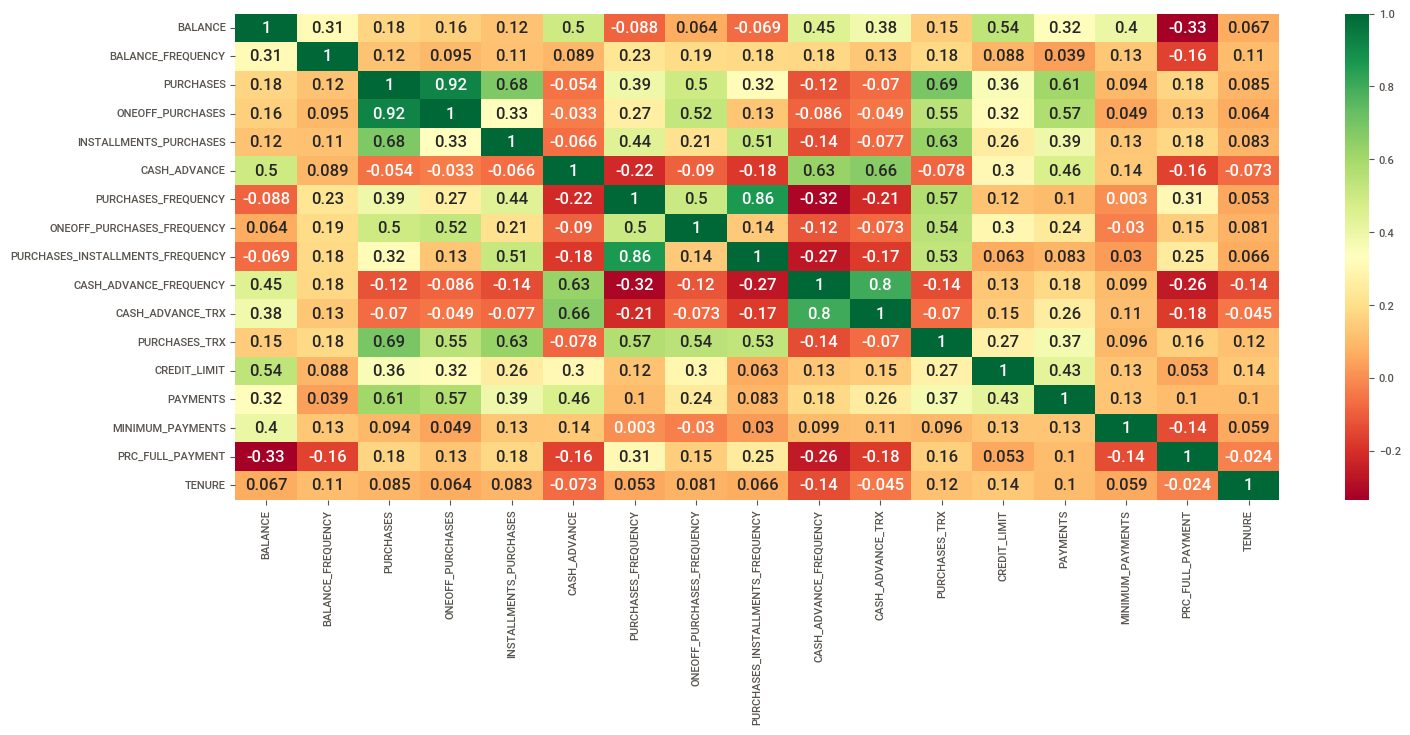

In [777]:
plt.figure(figsize=(15,6))
sns.heatmap(df_train.corr(), annot=True, cmap='RdYlGn')

In [778]:
from sklearn.model_selection import train_test_split
x_trai, x_tes, y_trai, y_tes = train_test_split(x_train1, y_train1, random_state=45, test_size=0.2)

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

li_re= LinearRegression()
ri_re= Ridge()
la_re= Lasso()
de_tr_re= DecisionTreeRegressor()
ra_fo_re= RandomForestRegressor()
ad_bo_re= AdaBoostRegressor()
gr_bo_re= GradientBoostingRegressor()
xgb_re= XGBRegressor()
kn_re= KNeighborsRegressor()
svm_re= SVR()


model1=[li_re, ri_re, la_re, de_tr_re, ra_fo_re, ad_bo_re, gr_bo_re, xgb_re, kn_re, svm_re]

from sklearn.metrics import r2_score, mean_squared_error

r2_scor=[]
mse=[]
for models1 in model1:
    models1.fit(x_trai, y_trai)
    y_pre= models1.predict(x_tes)
    r2_s = r2_score(y_tes, y_pre)
    ms_e = mean_squared_error(y_tes, y_pre)
    print(f'model:{models1}, r2_score:{r2_s}, mse:{ms_e} ')

model:LinearRegression(), r2_score:0.22202547074725942, mse:3762351.51708268 
model:Ridge(), r2_score:0.22200187433913388, mse:3762465.631335231 
model:Lasso(), r2_score:0.22159019272383196, mse:3764456.5589191634 
model:DecisionTreeRegressor(), r2_score:0.3109738109945813, mse:3332189.7183500915 
model:RandomForestRegressor(), r2_score:0.6230971637999987, mse:1822734.426706611 
model:AdaBoostRegressor(), r2_score:-1.3286510602150567, mse:11261556.156050012 
model:GradientBoostingRegressor(), r2_score:0.5200013310391298, mse:2321314.7120603314 
model:XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_ste

In [779]:
# XGBRegressor is the best model
from xgboost import XGBRegressor
xgb_regressor=XGBRegressor(random_state=45)

params = {
    'max_depth': [3, 5], 
    'learning_rate': [0.1],
    'n_estimators': [100], 
    'min_child_weight': [1], 
    'gamma': [0], 
    'subsample': [0.6], 
    'colsample_bytree': [0.6] 
}

from sklearn.model_selection import GridSearchCV
xgb_model= GridSearchCV(xgb_regressor, params, cv=5, scoring='r2', verbose=1)
xgb_model.fit(x_trai, y_trai)

print(f'best_params : {xgb_model.best_params_}')
print(f'best_score : {xgb_model.best_score_}')
print(f'best_estimator : {xgb_model.best_estimator_}')

Fitting 5 folds for each of 2 candidates, totalling 10 fits
best_params : {'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.6}
best_score : 0.3878981590270996
best_estimator : XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=45,
             reg_alpha=0, reg_lambda=1, ...)


In [780]:
df2=df1.copy()

In [781]:
final_model = xgb_model.best_estimator_
final_model.fit(x_train1, y_train1)
y_pre= final_model.predict(x_test1)


predicted = pd.DataFrame({'y_pre' : y_pre})
predicted['null'] = df1[df1.MINIMUM_PAYMENTS.isnull()].MINIMUM_PAYMENTS
predicted['y_median_pred'] = predicted.null.fillna(df1.MINIMUM_PAYMENTS.median())
predicted['iy_mean_pred']=predicted.null.fillna(df1.MINIMUM_PAYMENTS.mean())

from sklearn.impute import IterativeImputer
it_im=IterativeImputer()
predicted['null'] = it_im.fit_transform(df1)[df1.MINIMUM_PAYMENTS.isnull(),-3]
predicted

y_pre        null      y_median_pred  iy_mean_pred
0     7887.533203   431.257378   312.343947     864.206542 
1    12485.405273  1430.358455   312.343947     864.206542 
2    12085.070312  1947.435746   312.343947     864.206542 
3      273.390503   348.833876   312.343947     864.206542 
4     4298.262695   410.533453   312.343947     864.206542 
5    15576.236328  1905.763576   312.343947     864.206542 
6      198.854218   131.537434   312.343947     864.206542 
7     5273.411621   815.634457   312.343947     864.206542 
8    13615.719727  1402.014317   312.343947     864.206542 
9    12736.002930  1764.771553   312.343947     864.206542 
10     -79.074684    54.201733   312.343947     864.206542 
11     621.042480    12.115761   312.343947     864.206542 
12   20970.029297  1748.378069   312.343947     864.206542 
13    5141.021484   218.096294   312.343947     864.206542 
14    3521.637939 -1117.795320   312.343947     864.206542 
15     161.778503  -161.304395   312.343947     864.206542 
16   17485.216797  2298.265653   312.343947     864.206542 
17      67.948547  -389.624215   312.343947     864.206542 
18   17176.646484  2369.145113   312.343947     864.206542 
19   10121.375000  1020.815804   312.343947     864.206542 
20     187.073868  -128.854481   312.343947     864.206542 
21     103.808647  -805.203660   312.343947     864.206542 
22    2004.460327   482.631758   312.343947     864.206542 
23     376.391418  -128.547002   312.343947     864.206542 
24     255.836136  -362.386182   312.343947     864.206542 
25   23780.238281  1740.457402   312.343947     864.206542 
26   14807.441406   668.237260   312.343947     864.206542 
27     185.967529  -211.356368   312.343947     864.206542 
28    1015.302368   460.512195   312.343947     864.206542 
29    5415.687988   629.894607   312.343947     864.206542 
30      45.900089   -39.250078   312.343947     864.206542 
31     184.140961  -175.856406   312.343947     864.206542 
32    3838.780518    -2.126186   312.343947     864.206542 
33   20382.443359  2293.927317   312.343947     864.206542 
34     206.974808   244.106080   312.343947     864.206542 
35     226.652023   287.095642   312.343947     864.206542 
36   16406.591797  1725.950667   312.343947     864.206542 
37    4389.854004 -1076.342667   312.343947     864.206542 
38      61.313732 -1092.876288   312.343947     864.206542 
39     329.242859  -544.636732   312.343947     864.206542 
40      99.517891   193.989296   312.343947     864.206542 
41    5647.323730   551.254339   312.343947     864.206542 
42   29193.468750  4562.626676   312.343947     864.206542 
43    9277.461914  1303.311283   312.343947     864.206542 
44     275.650177     5.252004   312.343947     864.206542 
45    4566.578613   542.192539   312.343947     864.206542 
46    3444.503418   343.806349   312.343947     864.206542 
47    6723.034668   854.204914   312.343947     864.206542 
48    2124.473877   185.021185   312.343947     864.206542 
49    5505.274414   540.346132   312.343947     864.206542 
50    3626.154541   720.828779   312.343947     864.206542 
51   10796.889648  1137.710648   312.343947     864.206542 
52     354.533569    11.220252   312.343947     864.206542 
53    4998.082031   113.608763   312.343947     864.206542 
54   11716.958984  1312.740487   312.343947     864.206542 
55   12102.840820   796.458552   312.343947     864.206542 
56    1945.354614   -87.340485   312.343947     864.206542 
57   16312.631836  2637.322021   312.343947     864.206542 
58   25660.138672  1680.655160   312.343947     864.206542 
59     289.328552  -667.592073   312.343947     864.206542 
60     589.314758  -236.736437   312.343947     864.206542 
61     344.730713    57.704981   312.343947     864.206542 
62    2506.799316   425.727099   312.343947     864.206542 
63   12140.052734  1971.346785   312.343947     864.206542 
64    2983.145996   767.482283   312.343947     864.206542 
65    4568.065430  -850.631713   312.343947     8

In [782]:
df1.loc[df1.MINIMUM_PAYMENTS.isnull(), 'MINIMUM_PAYMENTS']

3      NaN
45     NaN
47     NaN
54     NaN
55     NaN
56     NaN
63     NaN
93     NaN
94     NaN
97     NaN
99     NaN
103    NaN
111    NaN
121    NaN
129    NaN
130    NaN
142    NaN
146    NaN
156    NaN
176    NaN
181    NaN
183    NaN
188    NaN
191    NaN
215    NaN
235    NaN
240    NaN
277    NaN
309    NaN
312    NaN
319    NaN
353    NaN
372    NaN
404    NaN
406    NaN
412    NaN
422    NaN
517    NaN
573    NaN
654    NaN
667    NaN
773    NaN
782    NaN
788    NaN
796    NaN
805    NaN
818    NaN
833    NaN
840    NaN
846    NaN
852    NaN
859    NaN
860    NaN
867    NaN
868    NaN
875    NaN
877    NaN
878    NaN
891    NaN
892    NaN
905    NaN
920    NaN
923    NaN
924    NaN
931    NaN
933    NaN
948    NaN
950    NaN
957    NaN
969    NaN
971    NaN
976    NaN
978    NaN
985    NaN
1001   NaN
1009   NaN
1015   NaN
1032   NaN
1039   NaN
1042   NaN
1045   NaN
1057   NaN
1086   NaN
1099   NaN
1122   NaN
1131   NaN
1155   NaN
1188   NaN
1189   NaN
1228   NaN
1281   NaN

In [783]:
df1['MINIMUM_PAYMENTS'] = df1['MINIMUM_PAYMENTS'].fillna(predicted['y_pre'])

In [784]:
df1.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    283
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

<Axes: xlabel='MINIMUM_PAYMENTS', ylabel='Density'>

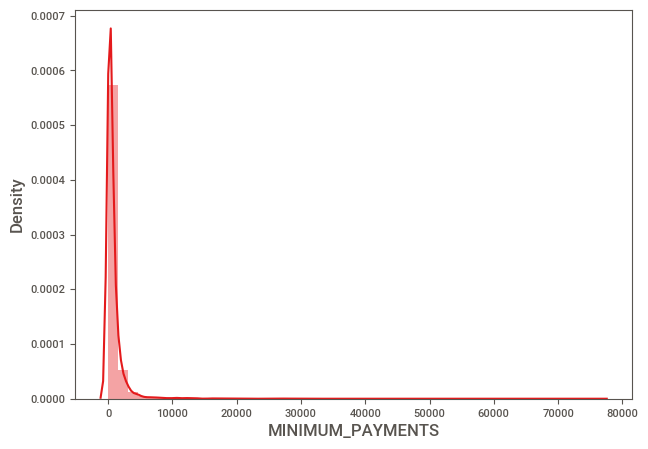

In [785]:
sns.distplot(df1.MINIMUM_PAYMENTS)

In [786]:
df1['MINIMUM_PAYMENTS'] = df1['MINIMUM_PAYMENTS'].fillna(df1.MINIMUM_PAYMENTS.median())

In [787]:
df1.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [788]:
df1.to_csv('customer_df_FINAL.csv')

### data visualisation

In [789]:
!pip install sweetviz
import sweetviz as sv
report1=sv.analyze(df1)
report1.show_html('report1.html')

                                             |      | [  0%]   00:00 -> (? left)

Report report1.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


0:117: execution error: File some object wasn’t found. (-43)


Shape of your Data Set loaded: (8950, 18)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  14
    Number of Integer-Categorical Columns =  3
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    18 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['Unnamed: 0']
To fix these data quality issues in the dataset, imp

Number of All Scatter Plots = 105


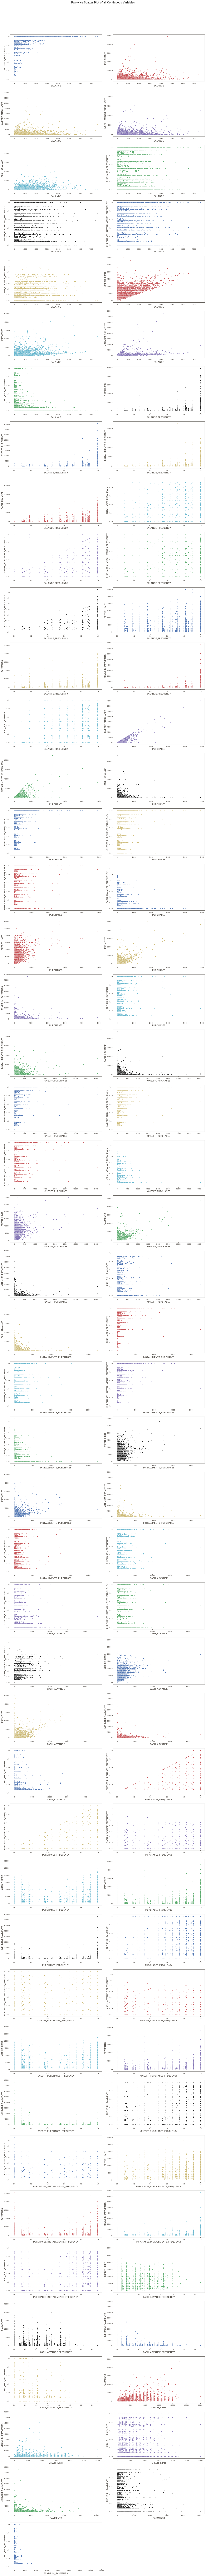

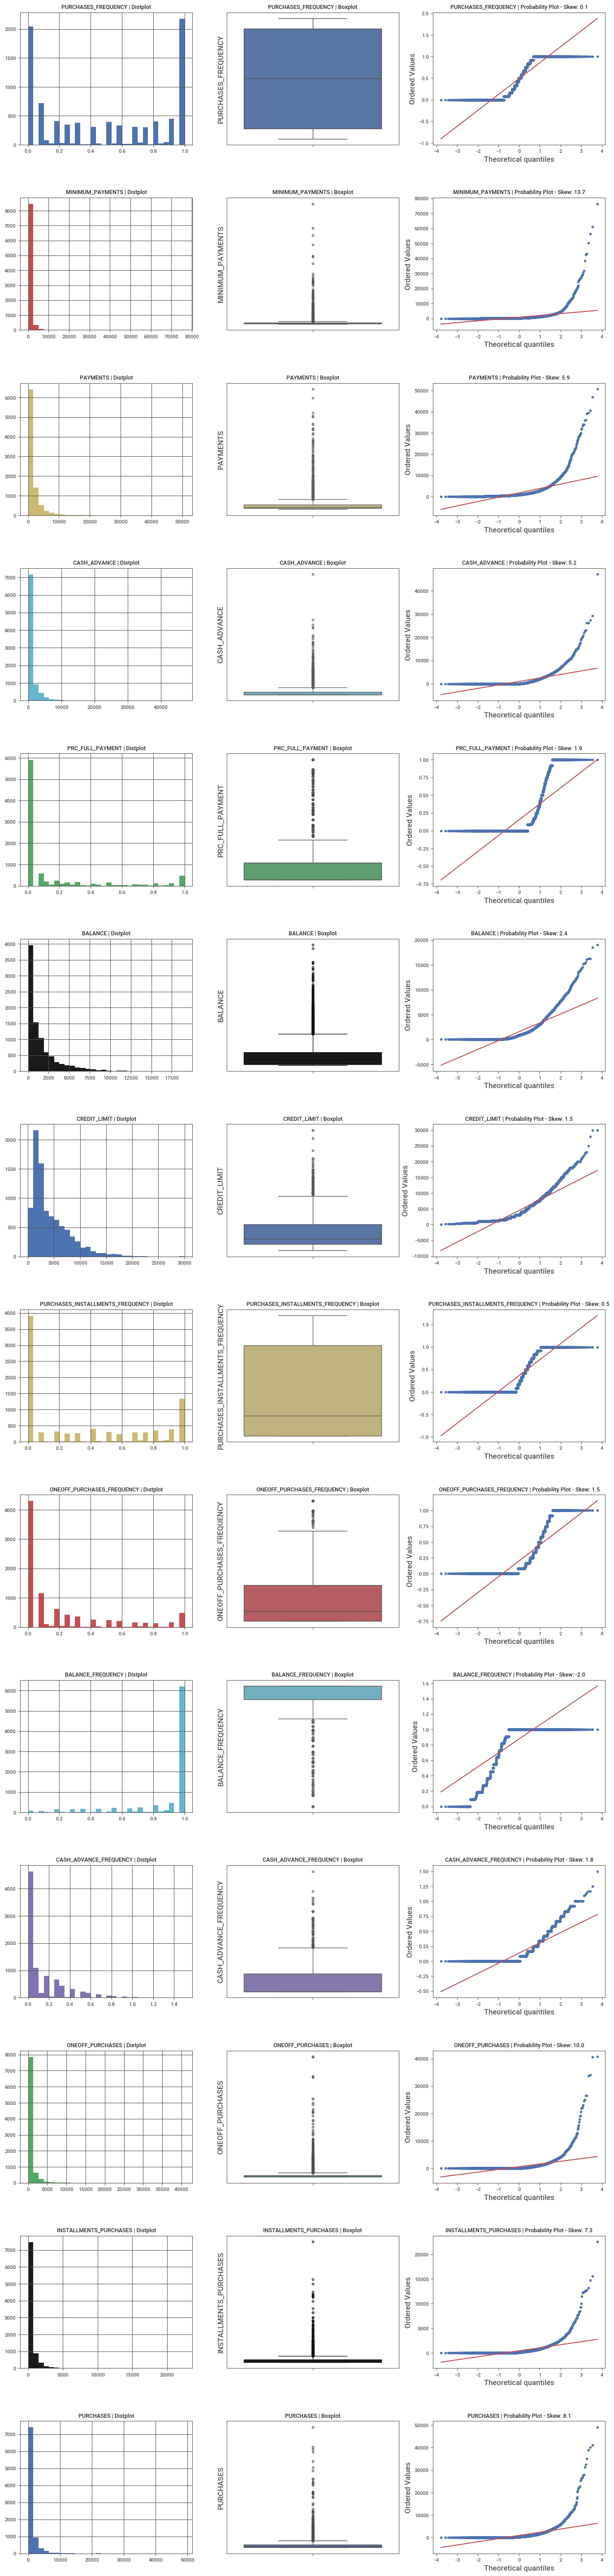

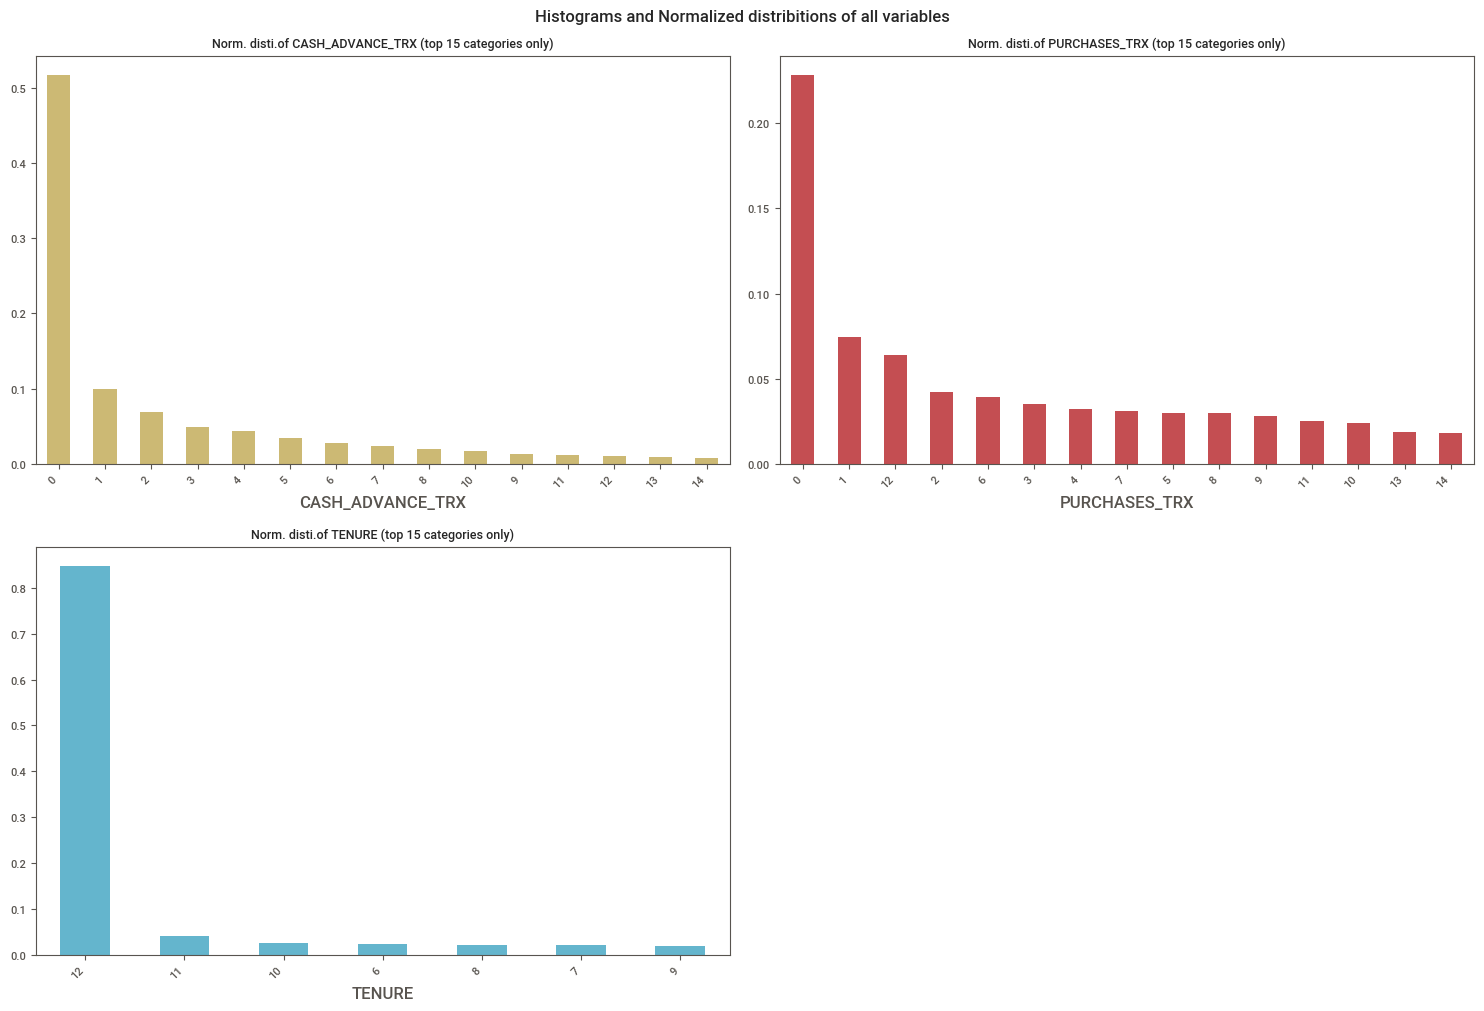

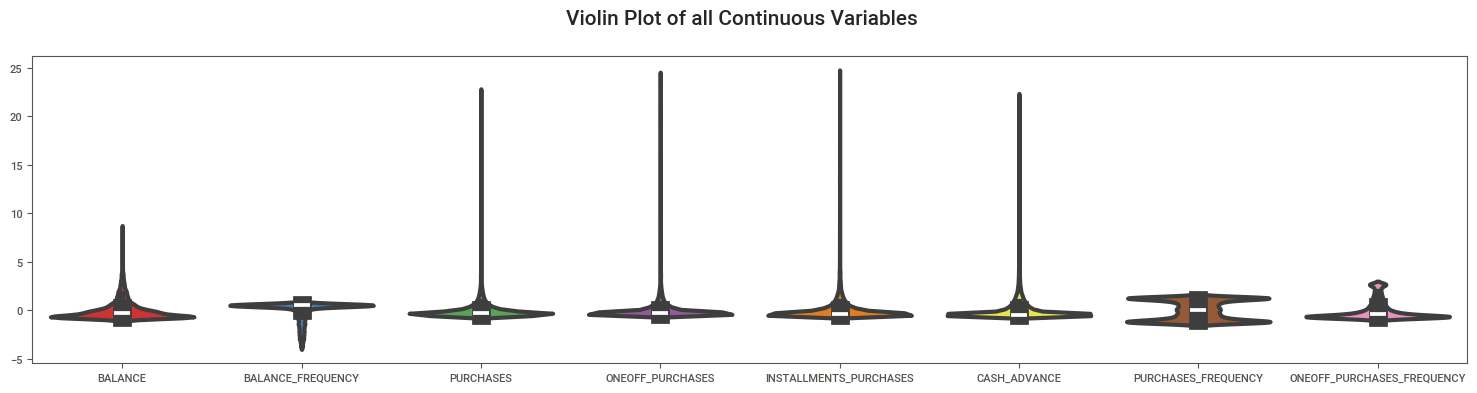

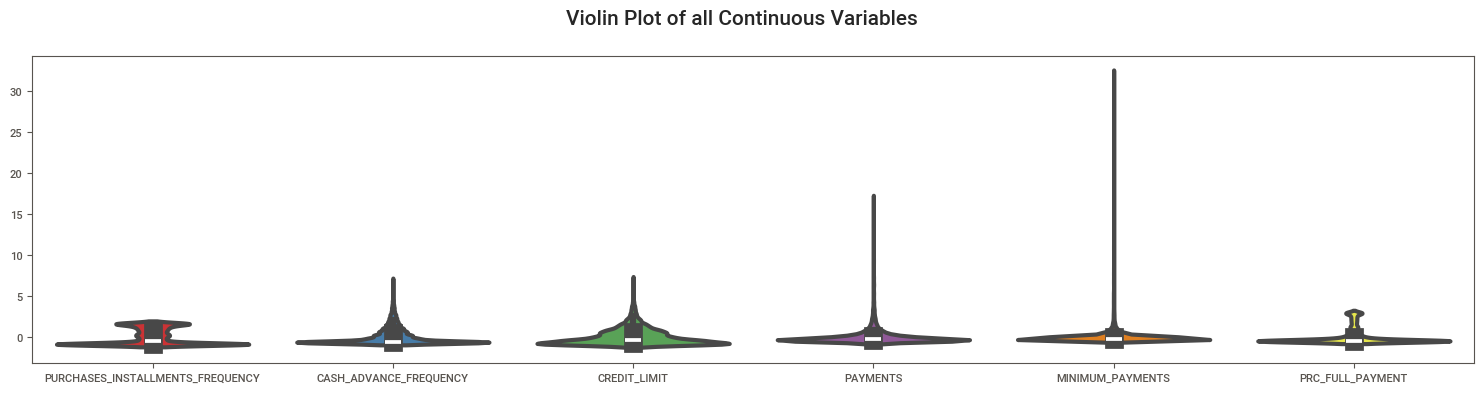

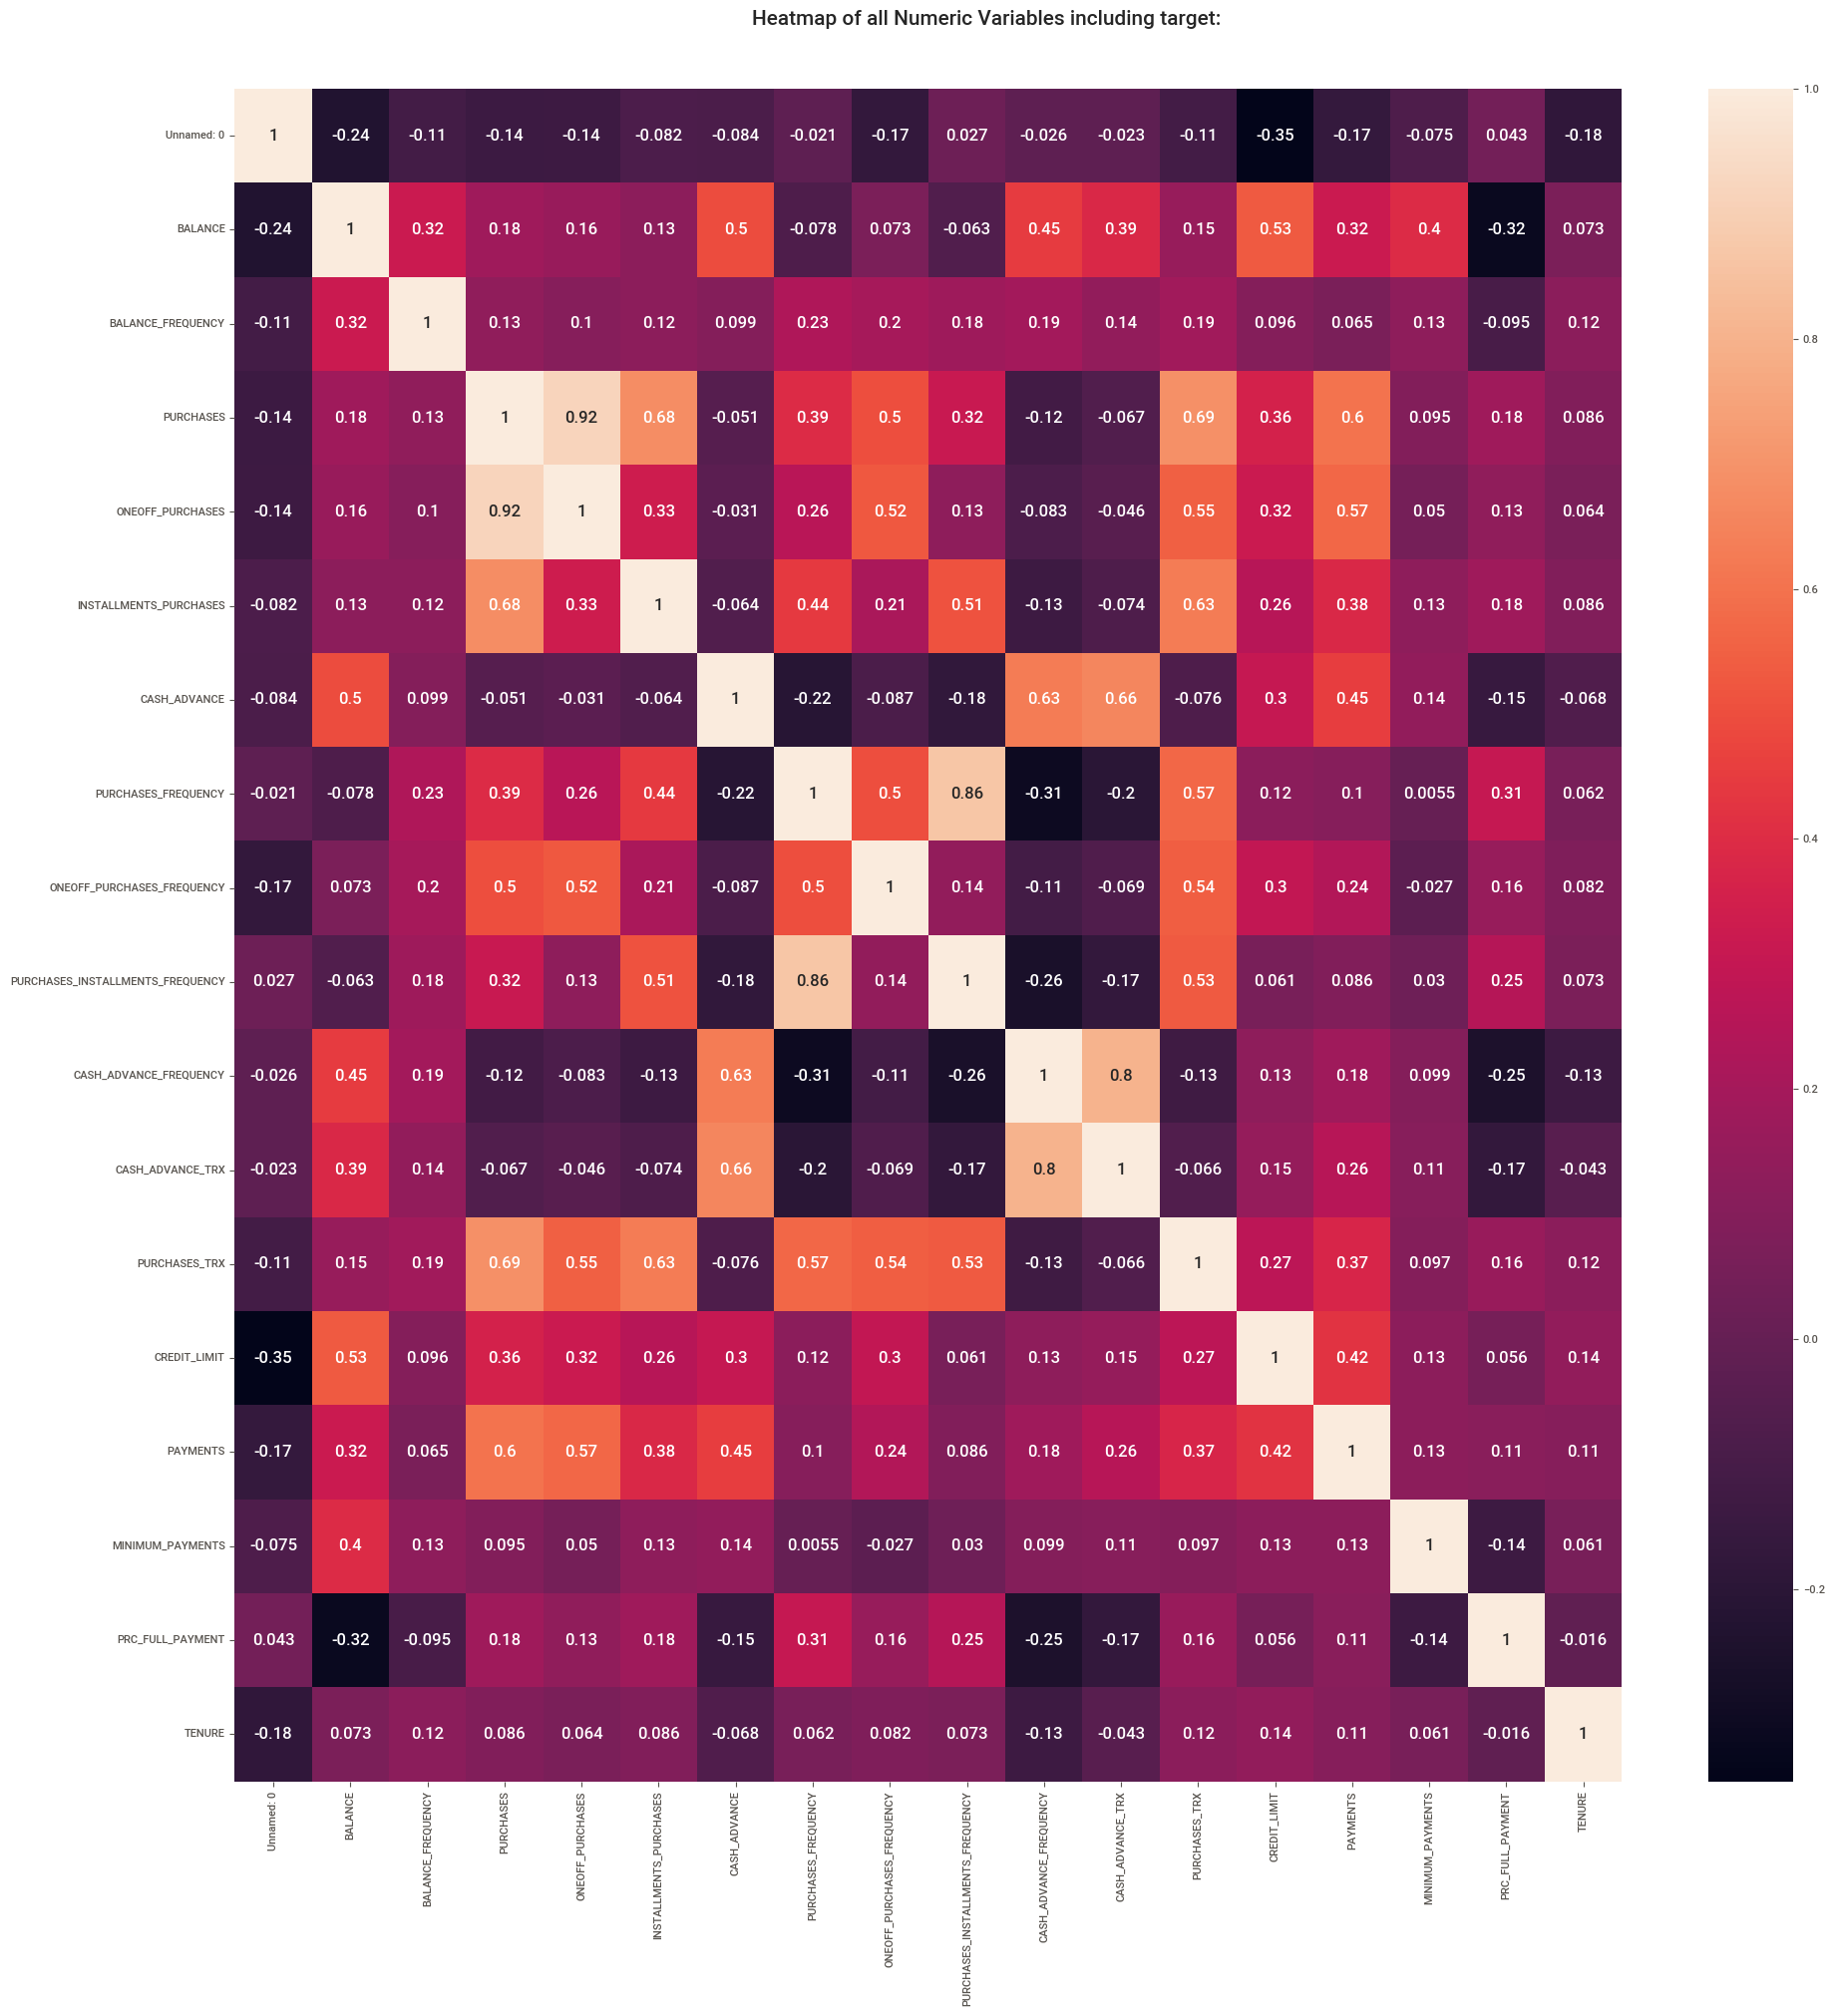

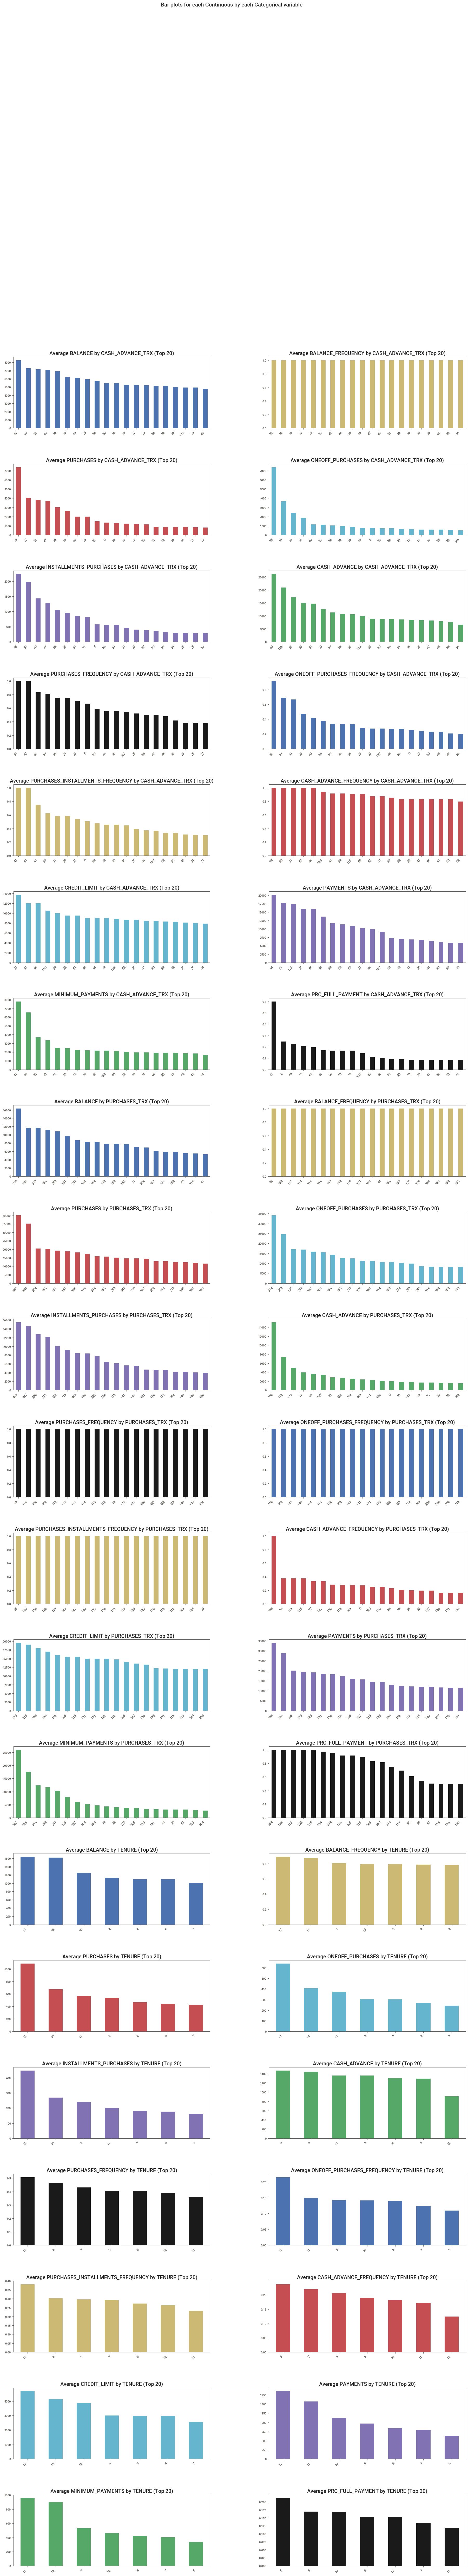

All Plots done
Time to run AutoViz = 10 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [790]:
!pip install autoviz
from autoviz.AutoViz_Class import AutoViz_Class
av=AutoViz_Class()
report2=av.AutoViz('customer_df_FINAL.csv', sep=',')
report2
%matplotlib inline

Target looks like regression


[<Axes: title={'center': 'Target distribution'}, xlabel='PURCHASES_TRX', ylabel='frequency'>,
 array([[<Axes: title={'center': 'F=9.24E-01'}, xlabel='PURCHASES_FREQUENCY', ylabel='PURCHASES_TRX'>,
         <Axes: title={'center': 'F=8.84E-01'}, xlabel='PURCHASES'>,
         <Axes: title={'center': 'F=7.83E-01'}, xlabel='INSTALLMENTS_PURCHASES'>,
         <Axes: title={'center': 'F=7.80E-01'}, xlabel='PURCHASES_INSTALLMENTS_FREQUENCY'>,
         <Axes: title={'center': 'F=6.04E-01'}, xlabel='ONEOFF_PURCHASES_FREQUENCY'>],
        [<Axes: title={'center': 'F=-4.08E-01'}, xlabel='CASH_ADVANCE', ylabel='PURCHASES_TRX'>,
         <Axes: title={'center': 'F=-4.07E-01'}, xlabel='CASH_ADVANCE_FREQUENCY'>,
         <Axes: title={'center': 'F=2.77E-01'}, xlabel='PAYMENTS'>,
         <Axes: title={'center': 'F=2.53E-01'}, xlabel='PRC_FULL_PAYMENT'>,
         <Axes: title={'center': 'F=2.00E-01'}, xlabel='BALANCE_FREQUENCY'>],
        [<Axes: title={'center': 'F=1.84E-01'}, xlabel='CREDIT_LIMIT', 

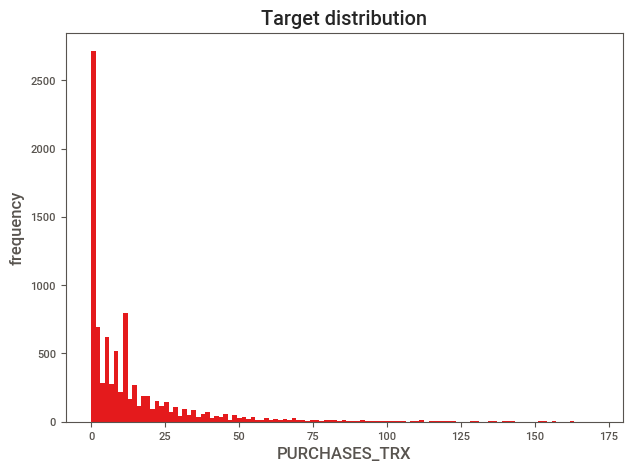

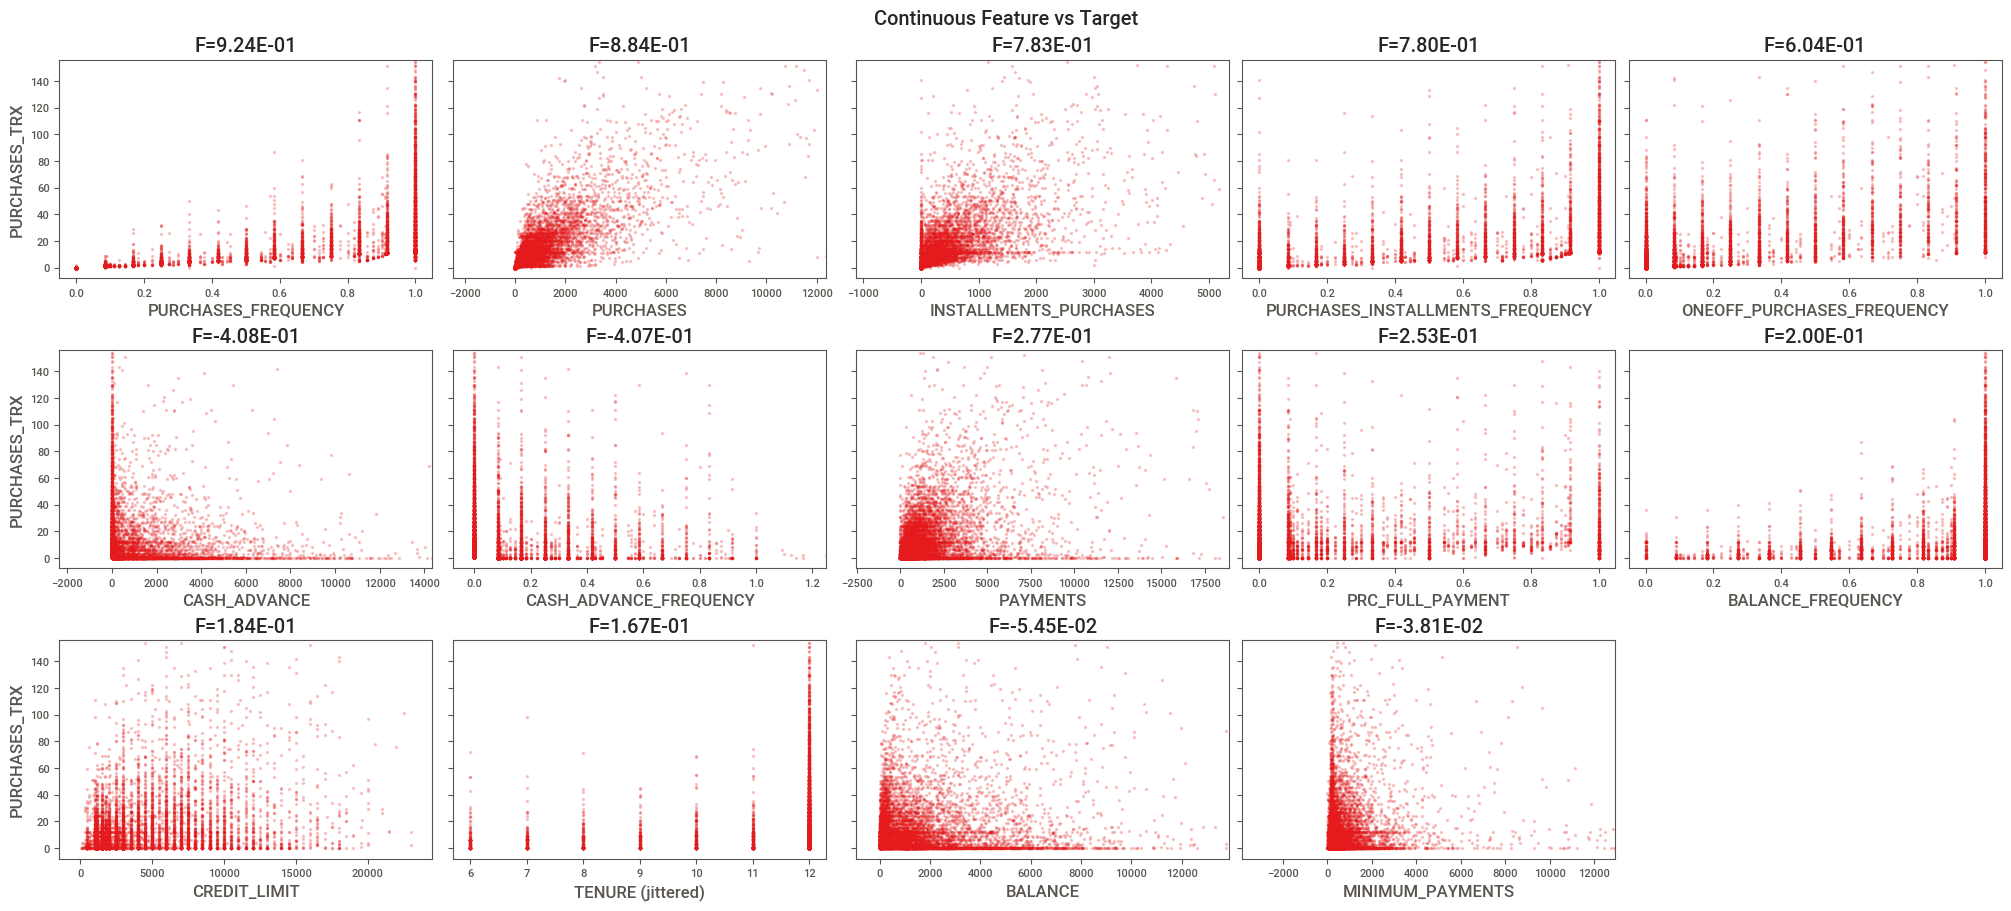

In [791]:
!pip install dabl
import dabl
dabl.plot(df1, target_col='PURCHASES_TRX')

### df1 is clean dataframe

In [792]:
df1.iloc[:5, :]

BALANCE    BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749      0.818182          95.40           0.00       
1  3202.467416      0.909091           0.00           0.00       
2  2495.148862      1.000000         773.17         773.17       
3  1666.670542      0.636364        1499.00        1499.00       
4   817.714335      1.000000          16.00          16.00       

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0           95.4               0.000000       0.166667         
1            0.0            6442.945483       0.000000         
2            0.0               0.000000       1.000000         
3            0.0             205.788017       0.083333         
4            0.0               0.000000       0.083333         

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0           0.000000                       0.083333               
1           0.000000                       0.000000               
2           1.000000                       0.000000               
3           0.083333                       0.000000               
4           0.083333                       0.000000               

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0         0.000000                 0               2           1000.0      
1         0.250000                 4               0           7000.0      
2         0.000000                 0              12           7500.0      
3         0.083333                 1               1           7500.0      
4         0.000000                 0               1           1200.0      

    PAYMENTS    MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084      139.509787        0.000000        12    
1  4103.032597     1072.340217        0.222222        12    
2   622.066742      627.284787        0.000000        12    
3     0.000000      273.390503        0.000000        12    
4   678.334763      244.791237        0.000000        12

In [793]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
ssc_df=sc.fit_transform(df1)
sc_df= pd.DataFrame(ssc_df, columns=df1.columns)
sc_df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    -0.731989     -0.249434      -0.424900      -0.356934       
1     0.786961      0.134325      -0.469552      -0.356934       
2     0.447135      0.518084      -0.107668       0.108889       
3     0.049099     -1.016953       0.232058       0.546189       
4    -0.358775      0.518084      -0.462063      -0.347294       
...        ...                ...        ...               ...   
8945 -0.737950      0.518084      -0.333293      -0.356934       
8946 -0.742423      0.518084      -0.329136      -0.356934       
8947 -0.740398     -0.185477      -0.401965      -0.356934       
8948 -0.745174     -0.185477      -0.469552      -0.356934       
8949 -0.572575     -0.889033       0.042146       0.301732       

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0           -0.349079          -0.466786        -0.806490         
1           -0.454576           2.605605        -1.221758         
2           -0.454576          -0.466786         1.269843         
3           -0.454576          -0.368653        -1.014125         
4           -0.454576          -0.466786        -1.014125         
...                      ...           ...                  ...   
8945        -0.132643          -0.466786         1.269843         
8946        -0.122823          -0.466786         1.269843         
8947        -0.294893          -0.466786         0.854576         
8948        -0.454576          -0.449352        -1.221758         
8949        -0.454576          -0.406205         0.439310         

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0             -0.678661                      -0.707313               
1             -0.678661                      -0.916995               
2              2.673451                      -0.916995               
3             -0.399319                      -0.916995               
4             -0.399319                      -0.916995               
...                          ...                               ...   
8945          -0.678661                       1.179833               
8946          -0.678661                       1.179833               
8947          -0.678661                       0.760469               
8948          -0.678661                      -0.916995               
8949           1.556082                      -0.916995               

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0           -0.675349            -0.476070       -0.511333      -0.960433     
1            0.573963             0.110074       -0.591796       0.688639     
2           -0.675349            -0.476070       -0.109020       0.826062     
3           -0.258913            -0.329534       -0.551565       0.826062     
4           -0.675349            -0.476070       -0.551565      -0.905464     
...                      ...               ...            ...           ...   
8945        -0.675349            -0.476070       -0.350408      -0.960433     
8946        -0.675349            -0.476070       -0.350408      -0.960433     
8947        -0.675349            -0.476070       -0.390639      -0.960433     
8948         0.157527            -0.182998       -0.591796      -1.097856     
8949         0.990398            -0.182998        0.333524      -0.905464     

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT   TENURE   
0    -0.528979     -0.303643         -0.525551      0.360680  
1     0.818642      0.094142          0.234227      0.360680  
2    -0.383805     -0.095642         -0.525551      0.360680  
3    -0.598688     -0.246552         -0.525551      0.360680  
4    -0.364368     -0.258748         -0.525551      0.360680  
...        ...               ...               ...       ...  
8945 -0.486217     -0.342287          1.183951     -4.122768  
8946 -0.503396     -0.229941         -0.525551     -4.122768  
8947 -0.570615     -0.327988          0.329200     -

### Hyperparameter tuning (checking for n_clusters)

cluster 1 - wcss 152149.99999999994 - sil_sco 0.22226120300725674
cluster 2 - wcss 128954.74488093855 - sil_sco 0.2802446828687702
cluster 3 - wcss 112602.48231026673 - sil_sco 0.20681476956766734
cluster 4 - wcss 99069.73849841778 - sil_sco 0.1974607763258376
cluster 5 - wcss 93613.06209906703 - sil_sco 0.19784686160604792
cluster 6 - wcss 87304.77205643518 - sil_sco 0.1841511029894659
cluster 7 - wcss 82496.97155651156 - sil_sco 0.19382203852945004
cluster 8 - wcss 76151.26495313164 - sil_sco 0.1997500234493813
cluster 9 - wcss 73267.48053946067 - sil_sco 0.19229495306898337
cluster 10 - wcss 70077.07455745558 - sil_sco 0.19636724575600983
cluster 11 - wcss 63675.15723759787 - sil_sco 0.21716430138275
cluster 12 - wcss 61397.47632753294 - sil_sco 0.21614304817794275
cluster 13 - wcss 60137.74165435319 - sil_sco 0.2209854869643959
cluster 14 - wcss 58125.86934211048 - sil_sco 0.22226120300725674
cluster 15 - wcss 56473.74405154974 - sil_sco 0.17012652805456838
cluster 16 - wcss 54957.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

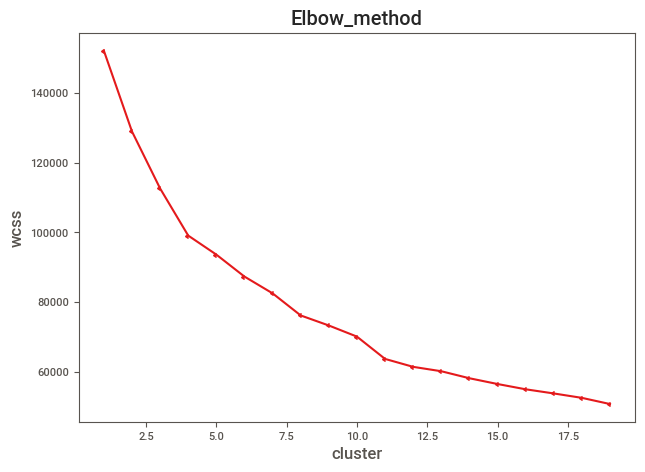

In [810]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

wcss=[]
silh_scor=[]
for i in range(1,20):
    kmeans=KMeans(i, init='k-means++', random_state=42)
    kmeans.fit(sc_df)
    wcss.append(kmeans.inertia_)

    if i>1:
        pred_df = kmeans.predict(sc_df)
        si_sc=silhouette_score(sc_df, pred_df)
        silh_scor.append(si_sc)
    else:
        silh_scor.append(None)

    if si_sc is not None:
        print(f'cluster {i} - wcss {wcss[-1]} - sil_sco {si_sc}')
    else:
        print(f'cluster {i} - wcss {wcss[-1]} - sil_sco {None}')


plt.plot(range(1,20), wcss, marker=8)
plt.title('Elbow_method')
plt.xlabel('cluster')
plt.ylabel('wcss')
plt.show()

### checking for best model

In [838]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score


cluster_models= [kmeans1, dbscan, hierar]

kmeans1=KMeans(n_clusters=4)
dbscan=DBSCAN(eps=0.5, min_samples=5)
hierar=AgglomerativeClustering(n_clusters=14)

sih_sco=[]
for model in cluster_models:
    # model.fit(sc_df)
    y_pre_clu = model.fit_predict(sc_df)
    sil_sco = silhouette_score(sc_df, y_pre_clu)
    sih_sco.append(sil_sco)
    print(f'{model.__class__.__name__} : {sil_sco}')

print(f'----------------------------------------------------------------------')
print(f'scores {sih_sco}')

KMeans : 0.19725036003679577
DBSCAN : -0.46579543062127554
AgglomerativeClustering : 0.15541915098314532
----------------------------------------------------------------------
scores [0.19725036003679577, -0.46579543062127554, 0.15541915098314532]


In [831]:
# using 4 as clusters

kmeans1 = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_pred = kmeans1.fit_predict(sc_df)
kmeans_pred

array([3, 0, 1, ..., 1, 3, 3], dtype=int32)

### Dimensionality reduction

In [885]:
pca=PCA(n_components=2)
pca_df = pca.fit_transform(sc_df)
pca_df = pd.DataFrame(pca_df, columns=['PCA1', 'PCA2'])


<IPython.core.display.Javascript object>

In [886]:
kmeans2=KMeans(n_clusters=13, init='k-means++', random_state=42)
kmeans2.fit(pca_df)

pca_pred= kmeans2.predict(pca_df)
pca_pred

array([12,  2,  7, ..., 12,  5,  7], dtype=int32)

In [888]:
pca_df['clusters'] = pca_pred
pca_df.head()

PCA1      PCA2    clusters
0 -1.683004 -1.073444     12   
1 -1.135724  2.508163      2   
2  0.969652 -0.382816      7   
3 -0.889124  0.001698      5   
4 -1.599649 -0.685025     12

In [902]:
centroids = pd.DataFrame(kmeans2.cluster_centers_, columns=['a', 'b'])
centroids

a          b    
0    2.206177   2.191302
1    0.150271  -1.621130
2   -1.418502   1.667714
3    7.695947   1.185984
4    4.039454  -0.570507
5   -1.728650   0.183080
6   -0.158215   5.981069
7    0.099880   0.010975
8   17.817995   3.931688
9    1.762624  -1.098839
10  -0.919787   3.425702
11   2.776177  11.221722
12  -1.314973  -1.031475

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

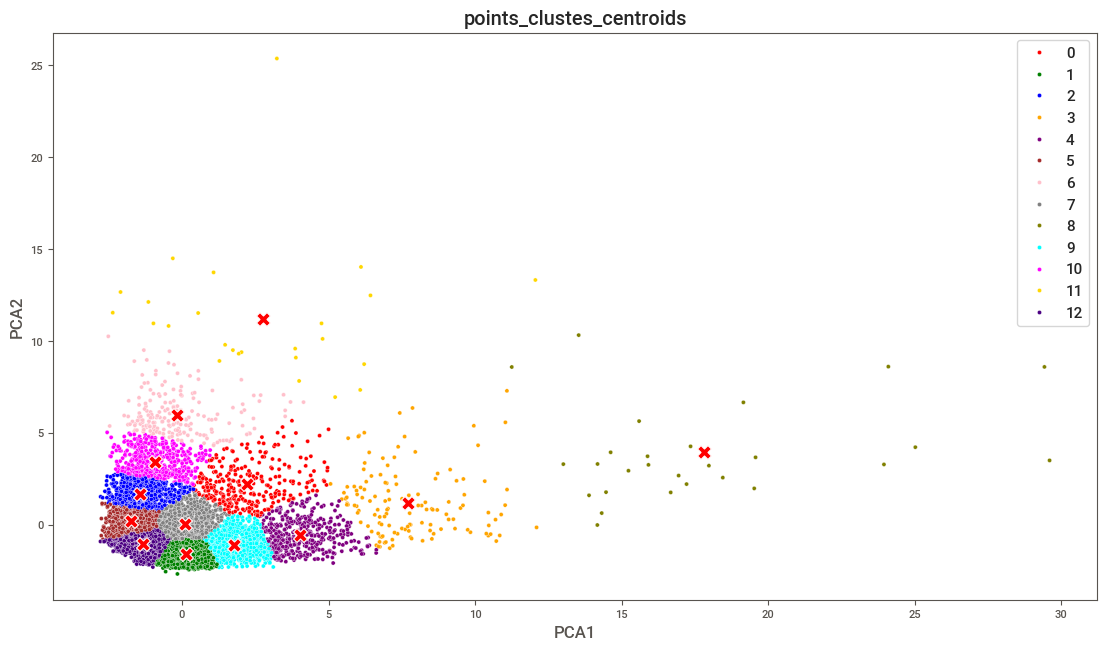

In [918]:
plt.figure(figsize=(12,7))
palette = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'gold', 'indigo']
sns.scatterplot(x=pca_df['PCA1'], y=pca_df['PCA2'], hue='clusters', data=pca_df, palette=palette)
sns.scatterplot(x= 'a', y='b', data=centroids, marker='X' , s=100, c='red')
plt.title('points_clustes_centroids')
plt.show()

In [919]:
# array = np.array(sc_df)

kmeans1=KMeans(n_clusters=13, init='k-means++', random_state=45)
kmeans1.fit(sc_df)

y_pred_group = kmeans1.predict(sc_df)

cluster_counts = np.bincount(y_pred_group)

print("Number of data points in each cluster:")
for label in range(len(cluster_counts)):
    print(f'cluster {label} : {cluster_counts[label]} points ')

Number of data points in each cluster:
cluster 0 : 573 points 
cluster 1 : 565 points 
cluster 2 : 742 points 
cluster 3 : 1061 points 
cluster 4 : 2231 points 
cluster 5 : 466 points 
cluster 6 : 22 points 
cluster 7 : 115 points 
cluster 8 : 808 points 
cluster 9 : 117 points 
cluster 10 : 36 points 
cluster 11 : 1528 points 
cluster 12 : 686 points 


### cluster center

In [920]:
kmeans_centers = kmeans1.cluster_centers_
kmeans_centers

array([[-3.47972455e-01, -3.75266086e-01, -2.97511132e-01,
        -2.19492297e-01, -2.99795647e-01,  4.07317564e-02,
        -2.18500137e-01, -2.84089638e-01, -2.43810909e-01,
         2.56234086e-01, -3.59505965e-02, -3.93307355e-01,
        -5.85667761e-01, -4.04076478e-01, -2.20090027e-01,
        -5.14991335e-02, -3.26207091e+00],
       [ 3.47142861e-01,  4.59785985e-01,  1.47205477e+00,
         1.31264365e+00,  1.06829721e+00, -2.33114314e-01,
         1.17601346e+00,  1.74761493e+00,  1.14462468e+00,
        -3.13025123e-01, -2.36425238e-01,  1.84871392e+00,
         9.29262530e-01,  7.21832286e-01,  4.88068084e-03,
         3.59960194e-01,  3.15712818e-01],
       [ 4.96995591e-01,  3.71801263e-01, -3.32553375e-01,
        -2.36961980e-01, -3.51050390e-01,  9.77495683e-01,
        -7.21911132e-01, -3.23234449e-01, -6.34842933e-01,
         1.98733120e+00,  1.67522734e+00, -4.03039001e-01,
         6.49471355e-02,  1.22731461e-01,  5.75163749e-02,
        -3.91252469e-01,  2.5

In [855]:
#  df1.columns = (17, )
#  kmeans_centers.shape = (13,17)
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
cluster_centers_df = pd.DataFrame(data=kmeans_centers, columns=[df1.columns])  # find all cluster centers
cluster_centers_df


BALANCE  BALANCE_FREQUENCY PURCHASES  ONEOFF_PURCHASES  \
0  -0.347972     -0.375266      -0.297511     -0.219492      
1   0.347143      0.459786       1.472055      1.312644      
2   0.496996      0.371801      -0.332553     -0.236962      
3  -0.699682     -2.256273      -0.324229     -0.238378      
4  -0.091651      0.392355      -0.367502     -0.251540      
5   2.494724      0.446534      -0.204829     -0.147067      
6   1.939627      0.324460      12.820388     13.414920      
7   1.836967      0.281301       0.006537      0.006421      
8  -0.243860      0.369938       0.259434      0.463013      
9   1.588565      0.452484       3.827780      2.489837      
10  1.290312      0.454124      -0.039755     -0.268864      
11 -0.253458      0.364254      -0.050755     -0.217394      
12 -0.705139      0.037321      -0.023980     -0.257815      

   INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0        -0.299796          0.040732        -0.218500        
1         1.068297         -0.233114         1.176013        
2        -0.351050          0.977496        -0.721911        
3        -0.328527         -0.308790        -0.613002        
4        -0.406697         -0.187701        -0.889177        
5        -0.214173          1.433150        -0.457167        
6         5.667044          0.016850         1.022571        
7         0.003327          5.062811        -0.286470        
8        -0.237161         -0.365545         0.826294        
9         4.479017         -0.016392         1.134970        
10        0.399233         -0.000938         0.022469        
11        0.279355         -0.335540         0.955489        
12        0.416368         -0.455008         0.863917        

   ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0          -0.284090                     -0.243811               
1           1.747615                      1.144625               
2          -0.323234                     -0.634843               
3          -0.458565                     -0.480798               
4          -0.424037                     -0.775190               
5          -0.258263                     -0.386376               
6           2.147779                      0.832904               
7          -0.027523                     -0.207512               
8           1.877842                     -0.309360               
9           1.527213                      1.262110               
10         -0.528409                      0.262206               
11         -0.320748                      1.161863               
12         -0.383245                      1.030031               

   CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0         0.256234           -0.035951       -0.393307    -0.585668     
1        -0.313025           -0.236425        1.848714     0.929263     
2         1.987331            1.675227       -0.403039     0.064947     
3        -0.508778           -0.371105       -0.434321    -0.191575     
4        -0.078427           -0.166045       -0.495980    -0.370931     
5         0.988404            0.699991       -0.284277     1.556174     
6        -0.467130           -0.202980        4.481007     3.131015     
7         2.546822            4.062721       -0.025059     1.471231     
8        -0.458656           -0.361815        0.276314     0.249661     
9        -0.180607           -0.046482        4.332242     1.717900     
10       -0.252602           -0.060885        0.219536    -0.004964     
11       -0.409323           -0.324547        0.185790    -0.322399     
12       -0.654203           -0.465817        0.090377    -0.117246     

    PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT   TENURE   
0  -0.404076     -0.220090       -0.051499     -3.262071  
1   0.721832      0.004881        0.359960      0.315713  
2   0.122731      0.057516       -0.391252      0.025779  
3  -0.201276     -0.278040        0.104367      0.193061  
4  -0.286534     -0.071

In [921]:
df1['cluster_no'] = kmeans1.labels_   # creating new column to the df1
df1.head()

BALANCE    BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749      0.818182          95.40           0.00       
1  3202.467416      0.909091           0.00           0.00       
2  2495.148862      1.000000         773.17         773.17       
3  1666.670542      0.636364        1499.00        1499.00       
4   817.714335      1.000000          16.00          16.00       

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0           95.4               0.000000       0.166667         
1            0.0            6442.945483       0.000000         
2            0.0               0.000000       1.000000         
3            0.0             205.788017       0.083333         
4            0.0               0.000000       0.083333         

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0           0.000000                       0.083333               
1           0.000000                       0.000000               
2           1.000000                       0.000000               
3           0.083333                       0.000000               
4           0.083333                       0.000000               

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0         0.000000                 0               2           1000.0      
1         0.250000                 4               0           7000.0      
2         0.000000                 0              12           7500.0      
3         0.083333                 1               1           7500.0      
4         0.000000                 0               1           1200.0      

    PAYMENTS    MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster_no  
0   201.802084      139.509787        0.000000        12         4      
1  4103.032597     1072.340217        0.222222        12         5      
2   622.066742      627.284787        0.000000        12         8      
3     0.000000      273.390503        0.000000        12         4      
4   678.334763      244.791237        0.000000        12         4

In [930]:
df1.cluster_no.value_counts()

cluster_no
4     2231
11    1528
3     1061
8      808
2      742
12     686
0      573
1      565
5      466
9      117
7      115
10      36
6       22
Name: count, dtype: int64

<Axes: xlabel='cluster_no', ylabel='count'>

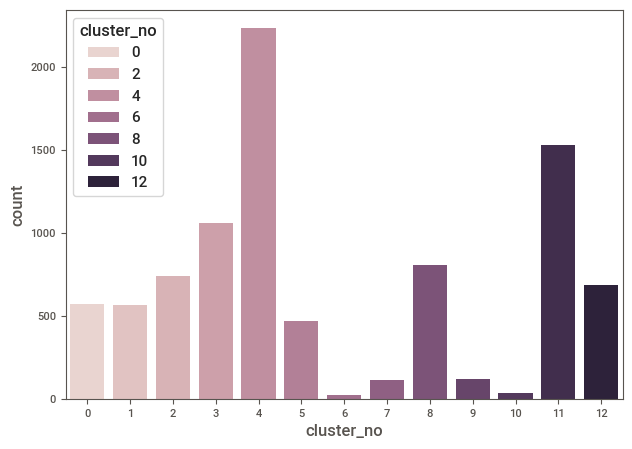

In [934]:
sns.countplot(x='cluster_no', data=df1, hue='cluster_no')

In [932]:
clus_df_0 = df1[df1.cluster_no==0] # dataframe with 0 cluster
clus_df_1 = df1[df1.cluster_no==1] # dataframe with 0 cluster
clus_df_2 = df1[df1.cluster_no==2] # dataframe with 0 cluster
clus_df_3 = df1[df1.cluster_no==3] # dataframe with 0 cluster
clus_df_4 = df1[df1.cluster_no==4] # dataframe with 0 cluster
clus_df_5 = df1[df1.cluster_no==5] # dataframe with 0 cluster
clus_df_6 = df1[df1.cluster_no==6] # dataframe with 0 cluster
clus_df_7 = df1[df1.cluster_no==7] # dataframe with 0 cluster
clus_df__8 = df1[df1.cluster_no==8] # dataframe with 0 cluster
clus_df_9 = df1[df1.cluster_no==9] # dataframe with 0 cluster
clus_df_10 = df1[df1.cluster_no==10] # dataframe with 0 cluster
clus_df_11 = df1[df1.cluster_no==11] # dataframe with 0 cluster
clus_df_12 = df1[df1.cluster_no==12] # dataframe with 0 cluster

### final model

In [935]:
kmeans2

KMeans(n_clusters=13, random_state=42)

In [937]:
import pickle
pickle.dump(kmeans2, open('kmeans_model.pkl', 'wb'))

In [938]:
pickle.load(open('kmeans_model.pkl', 'rb'))

KMeans(n_clusters=13, random_state=42)

In [949]:
df1.head()

BALANCE    BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749      0.818182          95.40           0.00       
1  3202.467416      0.909091           0.00           0.00       
2  2495.148862      1.000000         773.17         773.17       
3  1666.670542      0.636364        1499.00        1499.00       
4   817.714335      1.000000          16.00          16.00       

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0           95.4               0.000000       0.166667         
1            0.0            6442.945483       0.000000         
2            0.0               0.000000       1.000000         
3            0.0             205.788017       0.083333         
4            0.0               0.000000       0.083333         

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0           0.000000                       0.083333               
1           0.000000                       0.000000               
2           1.000000                       0.000000               
3           0.083333                       0.000000               
4           0.083333                       0.000000               

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0         0.000000                 0               2           1000.0      
1         0.250000                 4               0           7000.0      
2         0.000000                 0              12           7500.0      
3         0.083333                 1               1           7500.0      
4         0.000000                 0               1           1200.0      

    PAYMENTS    MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster_no  
0   201.802084      139.509787        0.000000        12         4      
1  4103.032597     1072.340217        0.222222        12         5      
2   622.066742      627.284787        0.000000        12         8      
3     0.000000      273.390503        0.000000        12         4      
4   678.334763      244.791237        0.000000        12         4

### Traning & Testing

In [941]:
[column for column in df1.columns]  # columns

['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE',
 'cluster_no']

In [965]:
df1.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
cluster_no                          0
dtype: int64

In [1029]:
y = df1.cluster_no
x = df1.drop(columns=['cluster_no'])

In [1034]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x_1 = sc.fit_transform(x)
y_1 = np.array(y)

In [1037]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x_1, y_1, test_size=0.2, random_state=42)

print(f'x_train : {x_train.shape}')
print(f'y_train : {y_train.shape}')
print(f'x_test : {x_test.shape}')
print(f'y_test : {y_test.shape}')

x_train : (7160, 17)
y_train : (7160,)
x_test : (1790, 17)
y_test : (1790,)


### selection best classification model

In [1058]:
from sklearn.metrics import accuracy_score 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

lo_re = LogisticRegression()
de_tr = DecisionTreeClassifier()
ra_fo = RandomForestClassifier()
ad_bo = AdaBoostClassifier()
gr_bo = GradientBoostingClassifier()
xg_bo = XGBClassifier()
na_ba = GaussianNB()
svm_c = SVC()
kn_c = KNeighborsClassifier()

models1 = [lo_re, de_tr, ra_fo, ad_bo, gr_bo, xg_bo, na_ba, svm_c, kn_c]

accu_score = []
for model in models1:
    model.fit(x_train,y_train)
    y_pred_c=model.predict(x_test)
    accu=accuracy_score(y_test,y_pred_c)
    accu_score.append(accu)
    print(f'{model.__class__.__name__} : {accu}')
    
print('--------------------------------------------------------------')
print(accu_score)

LogisticRegression : 0.976536312849162
DecisionTreeClassifier : 0.8877094972067039
RandomForestClassifier : 0.9329608938547486
AdaBoostClassifier : 0.41787709497206704
GradientBoostingClassifier : 0.9413407821229051
XGBClassifier : 0.9491620111731843
GaussianNB : 0.8122905027932961
SVC : 0.9569832402234637
KNeighborsClassifier : 0.9134078212290503
--------------------------------------------------------------
[0.976536312849162, 0.8877094972067039, 0.9329608938547486, 0.41787709497206704, 0.9413407821229051, 0.9491620111731843, 0.8122905027932961, 0.9569832402234637, 0.9134078212290503]


### the LogisticRegression is the best model

In [1048]:
from sklearn.linear_model import LogisticRegression
lg =LogisticRegression(C=100, max_iter=100)

from sklearn.model_selection import GridSearchCV
params={'C':[1,5,10], 'max_iter':[100, 150]}
f1_model1=GridSearchCV(lg, params, scoring='f1', cv=5)
f1_model1.fit(x_train, y_train)

print(f'f1_model1 : {f1_model1.fit(x_train, y_train)}')
print(f'---------------------------------------------------------------------------------')
y_pred_g1=f1_model1.predict(x_test)

from sklearn.metrics import f1_score, confusion_matrix, classification_report, accuracy_score
print(f'accuracy_score : {accuracy_score(y_test, y_pred_g1)}')
print(f'---------------------------------------------------------------------------------')
print(f'confusion_matrix :-\n{confusion_matrix(y_test, y_pred_g1)}')
print(f'---------------------------------------------------------------------------------')
print(f'classification_report :-\n{classification_report(y_test, y_pred_g1)}')

f1_model1 : GridSearchCV(cv=5, estimator=LogisticRegression(C=100),
             param_grid={'C': [1, 5, 10], 'max_iter': [100, 150]},
             scoring='f1')
---------------------------------------------------------------------------------
accuracy_score : 0.976536312849162
---------------------------------------------------------------------------------
confusion_matrix :-
[[110   0   2   0   0   0   0   0   0   0   0   0   0]
 [  0 122   0   0   0   0   0   0   3   1   0   0   0]
 [  0   0 148   0   1   1   0   2   0   0   0   0   0]
 [  0   0   0 199   0   0   0   0   0   0   0   0   0]
 [  1   0   2   2 463   1   0   0   0   0   0   2   0]
 [  0   0   3   0   1  85   0   0   0   0   1   0   0]
 [  0   0   0   0   0   0   5   0   0   0   0   0   0]
 [  0   0   1   0   0   0   0  18   0   0   0   0   0]
 [  0   3   2   1   0   0   0   0 162   0   0   1   0]
 [  0   1   0   0   0   0   1   0   0  21   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   5   1   0]
 [  0   0   1 

In [1049]:
print(f'best_params_ : {f1_model1.best_params_}')
print(f'best_score_  : {f1_model1.best_score_}')
print(f'best_estimator_  : {f1_model1.best_estimator_}')

best_params_ : {'C': 1, 'max_iter': 100}
best_score_  : nan
best_estimator_  : LogisticRegression(C=1)


In [1050]:
final_lg_model = f1_model1.best_estimator_
final_lg_model

LogisticRegression(C=1)

### saving model

In [1054]:
import pickle
pickle.dump(final_lg_model, open('lo_re_model.pkl', 'wb'))

In [1057]:
model1=pickle.load(open('lo_re_model.pkl', 'rb'))  # loading model
model1

LogisticRegression(C=1)